# Reporting dates vs incident dates
What happens if data is collected by reporting date instead of by incident date?

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from matplotlib import pyplot as plt
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.grid.which'] = "both"
plt.rcParams['xtick.minor.visible'] = True
plt.rcParams['ytick.minor.visible'] = True
def pltdflt(figsize=(12, 10)):
    fig, ax = plt.subplots(figsize=figsize)
    plt.grid(True, which="minor", linestyle="--")
    plt.grid(True, which="major", color="0.5")
    return fig, ax

In [3]:
hdat = pd.read_csv("../history.csv")
hdat["DATE_OF_INTEREST"] = pd.to_datetime(hdat["DATE_OF_INTEREST"])
hdat["AS_OF"] = pd.to_datetime(hdat["AS_OF"])

In [4]:
hdat.head()

,DATE_OF_INTEREST,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
0,2020-03-02,2020-03-26 11:26:41,1.00,NaN,NaN,NaN,NaN,1
1,2020-03-03,2020-03-26 11:26:41,1.50,NaN,NaN,3.0,3.000000,2
2,2020-03-04,2020-03-26 11:26:41,4.00,NaN,NaN,3.0,3.000000,9
3,2020-03-05,2020-03-26 11:26:41,3.25,NaN,NaN,4.0,3.333333,1
4,2020-03-06,2020-03-26 11:26:41,4.20,NaN,NaN,5.0,3.750000,8


In [5]:
rptdf = hdat.groupby("AS_OF").sum()
rptdf.head()

,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
AS_OF,,,,,,
2020-03-26 11:26:41,16765.854762,279.0,177.311905,3916.0,3309.288095,20010
2020-03-27 10:03:51,19609.854762,364.0,242.621429,4712.0,3910.359524,23109
2020-03-27 18:37:24,22871.471429,448.0,310.354762,5031.0,4187.447619,26695
2020-03-31 09:25:56,34171.042857,898.0,661.507143,7732.0,6937.850000,38085
2020-03-31 17:21:32,37605.614286,1091.0,817.935714,8537.0,7674.492857,41769


In [6]:
rptdf["new_cases"] = rptdf["NEW_COVID_CASE_COUNT"].diff()
rptdf["Cases/day, 7 day avg"] = rptdf["new_cases"].rolling(window="7D").mean()
rptdf.head()

,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT,new_cases
AS_OF,,,,,,,
2020-03-26 11:26:41,NaN,279.0,177.311905,3916.0,3309.288095,20010,NaN
2020-03-27 10:03:51,3099.00,364.0,242.621429,4712.0,3910.359524,23109,3099.0
2020-03-27 18:37:24,3342.50,448.0,310.354762,5031.0,4187.447619,26695,3586.0
2020-03-31 09:25:56,6025.00,898.0,661.507143,7732.0,6937.850000,38085,11390.0
2020-03-31 17:21:32,5439.75,1091.0,817.935714,8537.0,7674.492857,41769,3684.0


In [7]:
latest = hdat[hdat["AS_OF"] == np.max(hdat["AS_OF"])]
latest.set_index("DATE_OF_INTEREST", inplace=True)

In [8]:
latest.head()

,AS_OF,"Cases/day, 7 day avg",DEATH_COUNT,"Deaths/day, 7 day avg",HOSPITALIZED_CASE_COUNT,"Hospitalized/day, 7 day avg",NEW_COVID_CASE_COUNT
DATE_OF_INTEREST,,,,,,,
2020-02-29,2020-05-13 12:27:39,1.000000,0.0,0.0,14.0,14.000000,1
2020-03-01,2020-05-13 12:27:39,1.000000,0.0,0.0,4.0,9.000000,1
2020-03-02,2020-05-13 12:27:39,0.666667,0.0,0.0,22.0,13.333333,0
2020-03-03,2020-05-13 12:27:39,1.000000,0.0,0.0,20.0,15.000000,2
2020-03-04,2020-05-13 12:27:39,1.800000,0.0,0.0,22.0,16.400000,5


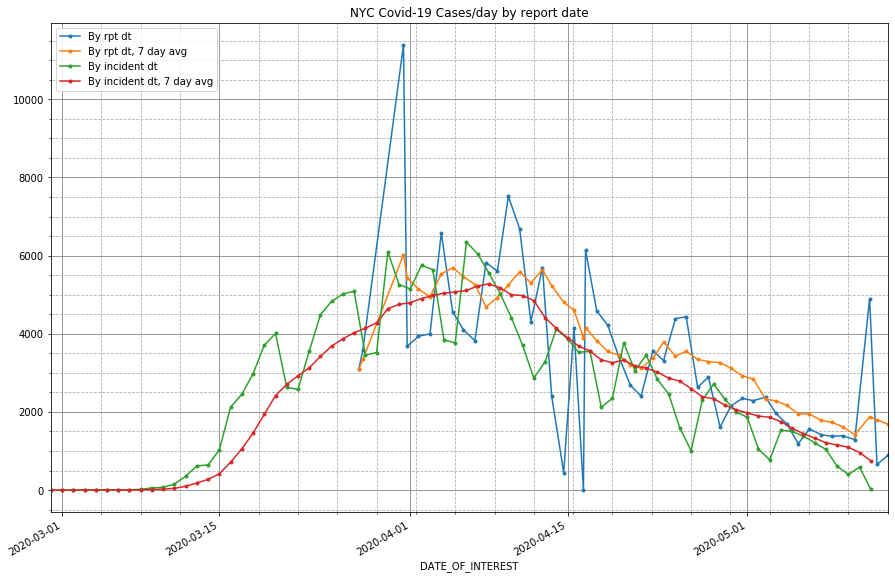

In [9]:
fig, ax = pltdflt((15,10))
rptdf[["new_cases", "Cases/day, 7 day avg"]].plot(style=".-", ax=ax)

latest[["NEW_COVID_CASE_COUNT", "Cases/day, 7 day avg"]].plot(style=".-", ax=ax)

ax.legend(["By rpt dt", "By rpt dt, 7 day avg", "By incident dt", "By incident dt, 7 day avg"], loc="upper left")
plt.title("NYC Covid-19 Cases/day by report date")
plt.savefig("casesPerDayHistoryRptDtVsInDt.png")